In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')
     

In [6]:
df_train = pd.read_csv("avila-tr.txt", header= None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [9]:
df_train.columns= ['intercolumnar distance', 'upper margin','lower margin','exploitation','row number','modular ratio','interlinear spacing','weight', 'peak number','modular/interlinear','class']
df_train

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular/interlinear,class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
...,...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
10427,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,E


In [10]:
df_train.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular/interlinear,class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [12]:
df_train.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular/interlinear
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541991,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


In [13]:
df_train.shape

(10430, 11)

In [14]:
df_train.isnull().sum()

intercolumnar distance    0
upper margin              0
lower margin              0
exploitation              0
row number                0
modular ratio             0
interlinear spacing       0
weight                    0
peak number               0
modular/interlinear       0
class                     0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

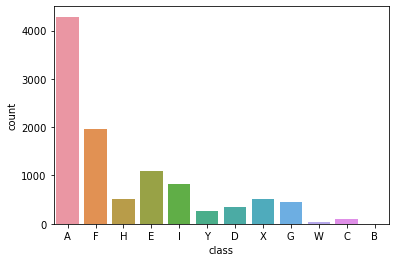

In [16]:
sns.countplot(x='class', data=df_train)

In [19]:
df_test = pd.read_csv("avila-ts.txt", header= None)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A


In [20]:
df_test.columns= ['intercolumnar distance', 'upper margin','lower margin','exploitation','row number','modular ratio','interlinear spacing','weight', 'peak number','modular/interlinear','class']
df_test

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular/interlinear,class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
...,...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


In [21]:
df_test.shape

(10437, 11)

In [22]:
df_test.isnull().sum()

intercolumnar distance    0
upper margin              0
lower margin              0
exploitation              0
row number                0
modular ratio             0
interlinear spacing       0
weight                    0
peak number               0
modular/interlinear       0
class                     0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

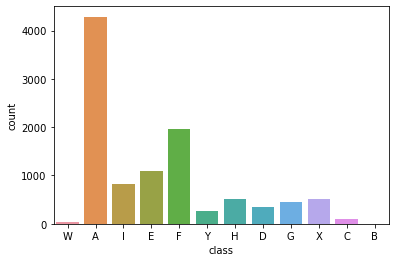

In [23]:
sns.countplot(x='class', data=df_test)

In [25]:
df=pd.concat([df_train, df_test])
df

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular/interlinear,class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
...,...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


In [29]:
X=df.iloc[:,0:10]
y=df.iloc[:,10]
print(y)

0        A
1        A
2        A
3        A
4        F
        ..
10432    X
10433    G
10434    A
10435    F
10436    H
Name: class, Length: 20867, dtype: object


In [34]:
samples = []
from sklearn.model_selection import StratifiedShuffleSplit

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [35]:
samples

[(      intercolumnar distance  upper margin  lower margin  exploitation  \
  6807                0.229043      0.109171     -0.066668      0.073324   
  8798                0.809204     -0.094960      0.118265      0.987502   
  1169                0.080916      0.438921      0.143160     -0.523288   
  6591               -0.030178      0.572391      5.083004     -0.109553   
  6869               -0.314087     -0.024299     -1.681275      0.307284   
  ...                      ...           ...           ...           ...   
  2693                0.043885      0.195534      0.260522     -0.393821   
  9218               -0.104241     -0.456114      0.484575      0.143802   
  9845                0.438888      0.289748      0.143160     -0.282494   
  369                -0.672058     -0.613138      0.360101      0.373406   
  2732               -0.030178     -0.063555      0.285416     -1.278877   
  
        row number  modular ratio  interlinear spacing    weight  peak number  \
  68

In [36]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])
     

In [37]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [38]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.71 Best Kernel =  rbf Best Nu =  8.58 Best Epsilon =  5.5
Best Accuracy =  0.68 Best Kernel =  rbf Best Nu =  6.66 Best Epsilon =  8.96
Best Accuracy =  0.65 Best Kernel =  rbf Best Nu =  8.36 Best Epsilon =  0.14
Best Accuracy =  0.71 Best Kernel =  rbf Best Nu =  2.66 Best Epsilon =  5.17
Best Accuracy =  0.76 Best Kernel =  rbf Best Nu =  7.87 Best Epsilon =  0.38
Best Accuracy =  0.69 Best Kernel =  rbf Best Nu =  5.5 Best Epsilon =  7.89
Best Accuracy =  0.69 Best Kernel =  rbf Best Nu =  9.85 Best Epsilon =  7.78
Best Accuracy =  0.69 Best Kernel =  rbf Best Nu =  9.68 Best Epsilon =  7.72
Best Accuracy =  0.54 Best Kernel =  rbf Best Nu =  1.37 Best Epsilon =  9.68
Best Accuracy =  0.72 Best Kernel =  rbf Best Nu =  5.97 Best Epsilon =  4.88


In [39]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.71,rbf,8.58,5.50
1,2,0.68,rbf,6.66,8.96
2,3,0.65,rbf,8.36,0.14
3,4,0.71,rbf,2.66,5.17
4,5,0.76,rbf,7.87,0.38
5,6,0.69,rbf,5.50,7.89
6,7,0.69,rbf,9.85,7.78
7,8,0.69,rbf,9.68,7.72
8,9,0.54,rbf,1.37,9.68
9,10,0.72,rbf,5.97,4.88


In [40]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [41]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))


In [42]:
train_sizes

array([  131,   397,   662,   928,  1193,  1459,  1724,  1990,  2256,
        2521,  2787,  3052,  3318,  3584,  3849,  4115,  4380,  4646,
        4911,  5177,  5443,  5708,  5974,  6239,  6505,  6771,  7036,
        7302,  7567,  7833,  8098,  8364,  8630,  8895,  9161,  9426,
        9692,  9958, 10223, 10489, 10754, 11020, 11285, 11551, 11817,
       12082, 12348, 12613, 12879, 13145])

In [43]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

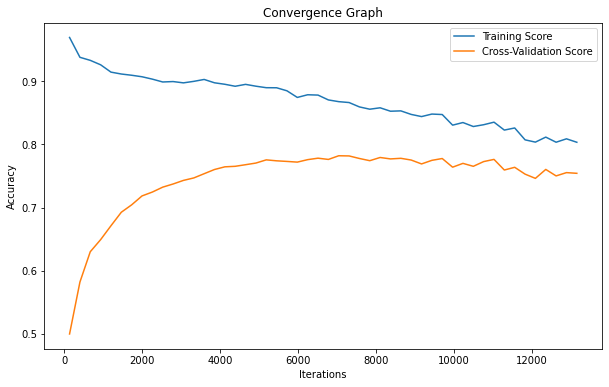

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()